In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mping.imread(target_folder + "/"  + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

In [18]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


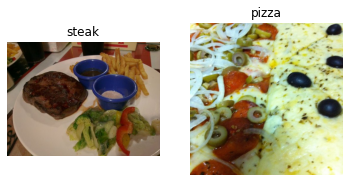

In [5]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
    )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size= (224, 224),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size= (224, 224),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)


test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size= (224, 224),
    batch_size= 30,
    class_mode= "binary",
    shuffle = False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
images, lables = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

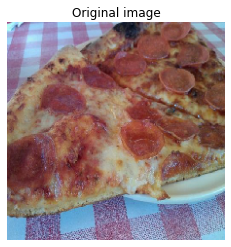

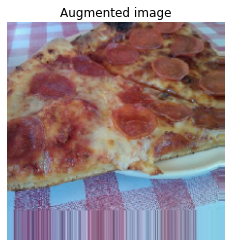

In [15]:
random_number = random.randint(0, 30)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [17]:
model_6 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
50/50 [==============================] - 77s 2s/step - loss: 0.7282 - accuracy: 0.4800 - val_loss: 0.6919 - val_accuracy: 0.5540
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.6927 - accuracy: 0.5080 - val_loss: 0.6803 - val_accuracy: 0.5120
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.6998 - accuracy: 0.5247 - val_loss: 0.6847 - val_accuracy: 0.6320
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.6894 - accuracy: 0.5660 - val_loss: 0.6775 - val_accuracy: 0.6760
Epoch 5/5
50/50 [==============================] - 74s 1s/step - loss: 0.6874 - accuracy: 0.5787 - val_loss: 0.6433 - val_accuracy: 0.6300


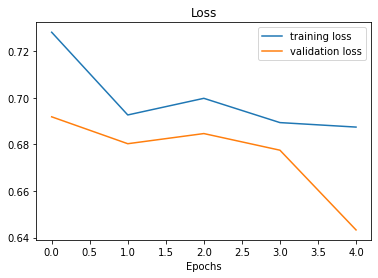

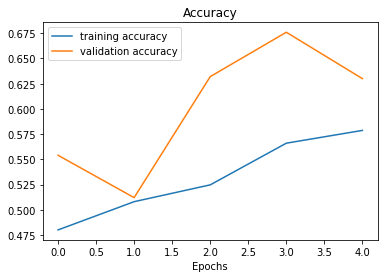

In [19]:
plot_loss_curves(history_6)

In [20]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size= (224, 224),
    batch_size= 30,
    class_mode= "binary",
    shuffle = True
)


Found 1500 images belonging to 2 classes.


In [21]:
model_7 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 0.6768 - accuracy: 0.5647 - val_loss: 0.5836 - val_accuracy: 0.7480
Epoch 2/5
50/50 [==============================] - 49s 971ms/step - loss: 0.5430 - accuracy: 0.7187 - val_loss: 0.3917 - val_accuracy: 0.8160
Epoch 3/5
50/50 [==============================] - 39s 778ms/step - loss: 0.5049 - accuracy: 0.7593 - val_loss: 0.4145 - val_accuracy: 0.8400
Epoch 4/5
50/50 [==============================] - 39s 773ms/step - loss: 0.4970 - accuracy: 0.7727 - val_loss: 0.6132 - val_accuracy: 0.6660
Epoch 5/5
50/50 [==============================] - 39s 774ms/step - loss: 0.5113 - accuracy: 0.7693 - val_loss: 0.3807 - val_accuracy: 0.8260


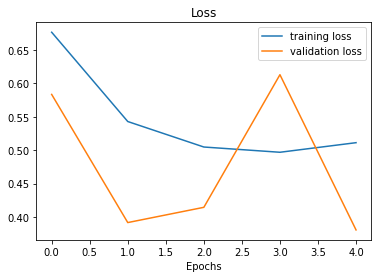

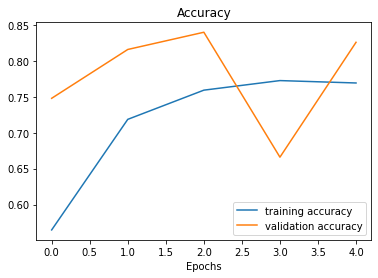

In [22]:
plot_loss_curves(history_7)

### 결과가 만족될때까지 반복한다.
    1) 모델 레이러을 추가 (더 많은 Convolution layer를 추가 등등)
    2) Convolution의 필터를 추가 (10에서 32, 64, 128 조정하는데 시행착오를 통해 최적값을 찾아내야한다.)
    3) 더 오래 학습한다. (epoch를 늘린다.)
    4) 이상적인 learning rate를 찾는다.
    5) 더 많은 데이터를 사용한다.
    6) 전이 학습 (transfer learning)을 사용

### 위의 작업들, 즉 모델 개발 중에 이러한 각 설정들을 조정하는 것을(1~4번) 하이퍼파라미터 조정이라고 한다.


In [79]:
# 컨볼루션 레이어를 추가, 맥스풀링 하나 제거
model_8 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_8.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs = 30,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/30
50/50 [==============================] - 56s 1s/step - loss: 0.6520 - accuracy: 0.6020 - val_loss: 0.5036 - val_accuracy: 0.7660
Epoch 2/30
50/50 [==============================] - 55s 1s/step - loss: 0.5435 - accuracy: 0.7267 - val_loss: 0.4124 - val_accuracy: 0.8320
Epoch 3/30
50/50 [==============================] - 55s 1s/step - loss: 0.5173 - accuracy: 0.7480 - val_loss: 0.3626 - val_accuracy: 0.8540
Epoch 4/30
50/50 [==============================] - 59s 1s/step - loss: 0.4646 - accuracy: 0.7880 - val_loss: 0.3502 - val_accuracy: 0.8440
Epoch 5/30
50/50 [==============================] - 61s 1s/step - loss: 0.4625 - accuracy: 0.7927 - val_loss: 0.3269 - val_accuracy: 0.8720
Epoch 6/30
50/50 [==============================] - 62s 1s/step - loss: 0.4661 - accuracy: 0.8013 - val_loss: 0.3286 - val_accuracy: 0.8720
Epoch 7/30
50/50 [==============================] - 61s 1s/step - loss: 0.4572 - accuracy: 0.8047 - val_loss: 0.2990 - val_accuracy: 0.8860
Epoch 8/30
50/50 [==

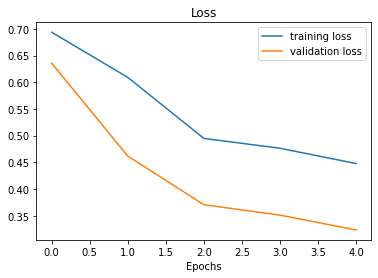

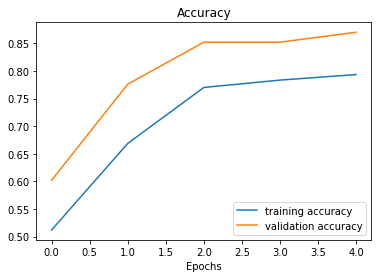

In [25]:
plot_loss_curves(history_8)

In [27]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
    )
)

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [28]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2021-06-13 10:41:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: `03-steak.jpeg'

03-steak.jpeg       100%[===================>]   1.89M  3.91MB/s    in 0.5s    

2021-06-13 10:41:05 (3.91 MB/s) - `03-steak.jpeg' saved [1978213/1978213]



In [30]:
import matplotlib.image as mpimg

(-0.5, 3023.5, 4031.5, -0.5)

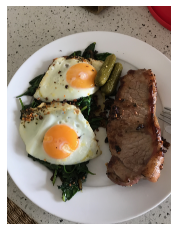

In [32]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [34]:
steak.shape

# 학습시 사용한 이미지의 크기는 (224, 224)
# 예측에 사용할 이미지 크기는 (4032, 3024)
# 예측할 이미지의 크기를 학습시 사용한 이미지의 크기로 변경해줘야한다. 

(4032, 3024, 3)

In [54]:
def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img / 255.
    return img

In [55]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
model_8.predict(steak)

ValueError: in user code:

    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/sangjulee1/Documents/cv_week07_1/week07_venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 224, 3)


(batch_size, 224, 224, 4)로 텐서를 변경해주어야 한다.

In [57]:
print(steak.shape)

(224, 224, 3)


In [58]:
steak = tf.expand_dims(steak, axis=0) # 차원 추가

In [59]:
print(steak.shape)

(1, 224, 224, 3)


In [60]:
pred = model_8.predict(steak)
pred

array([[0.76925814]], dtype=float32)

### 위 결과 0.7692...은 예측시 사용한 이미지가 특정 클래스에 속하는 확률이다.
### 0.5를 초과하면 positive 클래스, 즉 1일 가능성이 높다.
### 0.5 보다 미만이면 negative 클래스, 즉, 클래스가 0일 가능성이 높다.
### 기준이 되는 즉, cutoff가 되는 0.5는 변경이 가능하다. (e.g. 0.8 이상만 positive로 보겠다.)

In [62]:
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [64]:
int(tf.round(pred)[0][0])

1

In [74]:
pred_class = class_names[int(tf.round(pred)[0][0])+1]
pred_class

'steak'

In [75]:
def pred_and_plot(model, filename, class_name):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis = 0))

    pred_class = class_names[int(tf.round(pred)[0][0])+1]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)


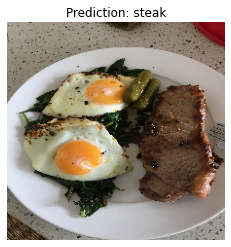

In [76]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [72]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-06-13 11:02:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: `03-pizza-dad.jpeg'

03-pizza-dad.jpeg   100%[===================>]   2.74M  7.54MB/s    in 0.4s    

2021-06-13 11:02:57 (7.54 MB/s) - `03-pizza-dad.jpeg' saved [2874848/2874848]



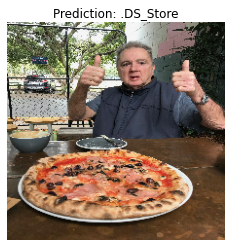

In [73]:
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)